# 1. Prepare & Data Cleaning & Filtering

-   Build Base Datas to Start the Code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.stats import linregress

# Path to CSV file
spreadspoke_scores_file = "../CSV_Files/spreadspoke_scores.csv"
nfl_teams_file = "../CSV_Files/nfl_teams.csv"
# Read CSV file into DataFrame
spreadspoke_scores_df = pd.read_csv(spreadspoke_scores_file)
nfl_teams_df = pd.read_csv(nfl_teams_file)

# Data inspection
# spreadspoke_scores_df
# nfl_teams_df

# Change Abbreviation with Old Abbreviation to Recent Abbreviation
nfl_teams_df['Abbreviation'] = nfl_teams_df['Abbreviation'].replace('LV', 'LVR')
spreadspoke_scores_df['team_favorite_id'] = spreadspoke_scores_df['team_favorite_id'].replace('LV', 'LVR')

# Data cleaning and filtering
# nfl_teams_clean_df = nfl_teams_df.drop(columns=['Conference', 'Division'])
last_5_years_df = spreadspoke_scores_df[spreadspoke_scores_df['schedule_season'] >= 2019]
clean_df = last_5_years_df.drop(columns=['stadium', 'stadium_neutral', 'weather_temperature', 'weather_wind_mph',
                              'weather_humidity', 'weather_detail', 'spread_favorite', 'over_under_line'])
clean_df['Result'] = ''

clean_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,Result
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,
...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,


-   Preparing for saving image datas

In [3]:
# Save Graph Images to Directed Folder
save_dir = "../Images"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

-   Mapping data names so that Abbreviation and Team name can mix

In [4]:
# Create a dictionary mapping team names to abbreviations
team_mapping = {
    'Kansas City Chiefs': 'KC',
    'Arizona Cardinals': 'ARI',
    'Atlanta Falcons': 'ATL',
    'Baltimore Ravens': 'BAL',
    'Buffalo Bills': 'BUF',
    'Carolina Panthers': 'CAR',
    'Chicago Bears': 'CHI',
    'Cincinnati Bengals': 'CIN',
    'Cleveland Browns': 'CLE',
    'Dallas Cowboys': 'DAL',
    'Denver Broncos': 'DEN',
    'Detroit Lions': 'DET',
    'Green Bay Packers': 'GB',
    'Houston Texans': 'HOU',
    'Indianapolis Colts': 'IND',
    'Jacksonville Jaguars': 'JAX',
    'Las Vegas Raiders': 'LVR',
    'Los Angeles Chargers': 'LAC',
    'Los Angeles Rams': 'LAR',
    'Miami Dolphins': 'MIA',
    'Minnesota Vikings': 'MIN',
    'New England Patriots': 'NE',
    'New Orleans Saints': 'NO',
    'New York Giants': 'NYG',
    'New York Jets': 'NYJ',
    'Philadelphia Eagles': 'PHI',
    'Pittsburgh Steelers': 'PIT',
    'San Francisco 49ers': 'SF',
    'Seattle Seahawks': 'SEA',
    'Tampa Bay Buccaneers': 'TB',
    'Tennessee Titans': 'TEN',
    'Washington Commanders': 'WAS'
}

# Apply the mapping to team_home and team_away columns
last_5_years_df['team_home_abbr'] = last_5_years_df['team_home'].map(team_mapping)
last_5_years_df['team_away_abbr'] = last_5_years_df['team_away'].map(team_mapping)


C:\Users\jacob\AppData\Local\Temp\ipykernel_27204\200241681.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_5_years_df['team_home_abbr'] = last_5_years_df['team_home'].map(team_mapping)
C:\Users\jacob\AppData\Local\Temp\ipykernel_27204\200241681.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_5_years_df['team_away_abbr'] = last_5_years_df['team_away'].map(team_mapping)


In [5]:
# Determine the resulting winner of each game and include the ID in the result column.
for index, row in clean_df.iterrows():
    if row['score_home'] > row['score_away']:
        clean_df.at[index, 'result'] = row['team_home']
    elif row['score_home'] < row['score_away']:
        clean_df.at[index, 'result'] = row['team_away']
    else:
        clean_df.at[index, 'result'] = 'Tie'

clean_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,Result,result
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,,Green Bay Packers
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,,Tie
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,,Los Angeles Rams
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,,Tennessee Titans
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,,Dallas Cowboys
...,...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,,Kansas City Chiefs
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,,Detroit Lions
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,,Kansas City Chiefs
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,,San Francisco 49ers


# 2. Calculation & Visual Datas

In [6]:
# Each team played count
games_played_by_team = clean_df['team_home'].value_counts() + clean_df['team_away'].value_counts()
games_played_by_team_df = games_played_by_team.reset_index()
games_played_by_team_df.columns = ['Name', 'Total played Game']
games_played_by_team

Arizona Cardinals           84
Atlanta Falcons             83
Baltimore Ravens            89
Buffalo Bills               92
Carolina Panthers           83
Chicago Bears               84
Cincinnati Bengals          89
Cleveland Browns            86
Dallas Cowboys              87
Denver Broncos              83
Detroit Lions               86
Green Bay Packers           90
Houston Texans              87
Indianapolis Colts          84
Jacksonville Jaguars        85
Kansas City Chiefs          99
Las Vegas Raiders           68
Los Angeles Chargers        84
Los Angeles Rams            90
Miami Dolphins              85
Minnesota Vikings           86
New England Patriots        85
New Orleans Saints          86
New York Giants             85
New York Jets               83
Oakland Raiders             16
Philadelphia Eagles         89
Pittsburgh Steelers         86
San Francisco 49ers         95
Seattle Seahawks            87
Tampa Bay Buccaneers        92
Tennessee Titans            88
Washingt

In [7]:
# Count of favorite team appearances
team_favorite_count = clean_df["team_favorite_id"].value_counts()
team_favorite_count_df = team_favorite_count.reset_index()
team_favorite_count_df.columns = ['Abbreviation', 'Favorite Pick Count']
team_favorite_count_df

,Abbreviation,Favorite Pick Count
0,KC,87
1,SF,73
2,BUF,69
3,BAL,66
4,DAL,62
5,TB,60
6,GB,59
7,PHI,58
8,LAR,55
9,NO,54


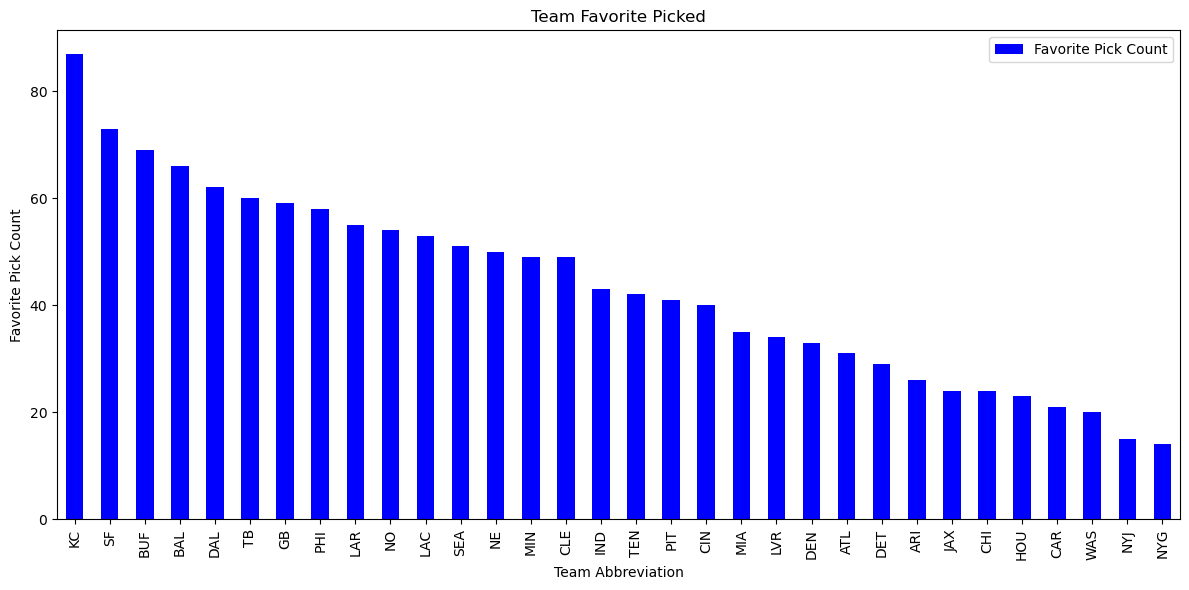

In [8]:
# Generate Bar Graph
team_favorite_count_df.plot(kind='bar', x='Abbreviation', y='Favorite Pick Count', color='blue', figsize=(12, 6))

# Labeling x-axis and y-axis
plt.title("Team Favorite Picked")
plt.xlabel('Team Abbreviation')
plt.ylabel('Favorite Pick Count')

# Save plot
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'Team Favorite Picked.png'))
plt.show()

In [10]:
# Count of favorite team appearances
favorite_wins_home = clean_df[clean_df["score_home"] > clean_df["score_away"]]["result"].value_counts()
favorite_wins_away = clean_df[clean_df["score_away"] > clean_df["score_home"]]["result"].value_counts()
favorite_wins = favorite_wins_home + favorite_wins_away
favorite_wins_df = favorite_wins.reset_index()
favorite_wins_df.columns = ['Name', 'Win Count']
favorite_wins_df

,Name,Win Count
0,Arizona Cardinals,32
1,Atlanta Falcons,32
2,Baltimore Ravens,58
3,Buffalo Bills,63
4,Carolina Panthers,24
5,Chicago Bears,32
6,Cincinnati Bengals,42
7,Cleveland Browns,44
8,Dallas Cowboys,51
9,Denver Broncos,32


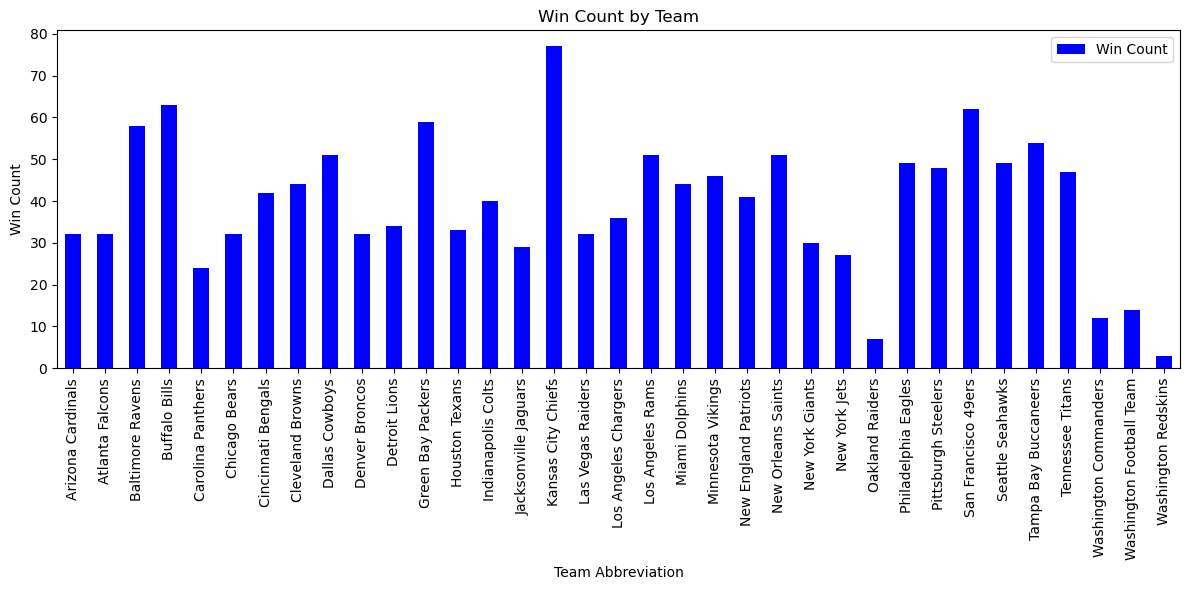

In [11]:
# Create Graph
favorite_wins_df.plot(kind='bar', x='Name', y='Win Count', color='blue', figsize=(12, 6))

# Labeling Title and labels
plt.title('Win Count by Team')
plt.xlabel('Team Abbreviation')
plt.ylabel('Win Count')

# Save plot
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'win_count_by_team.png'))
plt.show()

# 3. Merging Datas

-   Merging Datas into one Dataframe

In [15]:
# Merge Dateframes
merged_f_t = pd.merge(favorite_wins_df, nfl_teams_df, on='Name')
merged_df = pd.merge(merged_f_t, team_favorite_count_df, on='Abbreviation')
merged_Data = pd.merge(merged_df, games_played_by_team_df, on='Name')

# Create List for Value of 'Favorite Pick' and 'Win Count'
favorite_picks = []
Total_played_Game = []
win_rates = []

# Each Team Favorite Pick Calculation and add to merged_df
for index, row in merged_Data.iterrows():
    favorite_pick = row['Win Count'] + (row['Favorite Pick Count'] - row['Win Count'])
    favorite_picks.append(favorite_pick)
merged_Data['Favorite Pick Count'] = favorite_picks

# Each Team 'Win Count' Calculation and add to merged_df
for index, row in merged_Data.iterrows():
    win_rate = row['Win Count'] / row['Total played Game'] * 100
    win_rates.append(round(win_rate, 2))
merged_Data['Win Rate'] = win_rates

In [16]:
# Pie Graph for Win Count
"""
# Graph preparation
plt.figure(figsize=(8, 8))

# Assign data
labels = merged_Data['Abbreviation']
sizes = merged_Data['Win Count']

# Define explode values for each section
explode = [0.1] * len(labels)  # Adjust the values as per your preference

# Draw pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode)

# Add title
plt.title('Win Count by Team')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Save plot
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'win_count_pie_chart.png'))
plt.show()
"""

"\n# Graph preparation\nplt.figure(figsize=(8, 8))\n\n# Assign data\nlabels = merged_Data['Abbreviation']\nsizes = merged_Data['Win Count']\n\n# Define explode values for each section\nexplode = [0.1] * len(labels)  # Adjust the values as per your preference\n\n# Draw pie chart\nplt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode)\n\n# Add title\nplt.title('Win Count by Team')\n\n# Equal aspect ratio ensures that pie is drawn as a circle\nplt.axis('equal')\n\n# Save plot\nplt.tight_layout()\nplt.savefig(os.path.join(save_dir, 'win_count_pie_chart.png'))\nplt.show()\n"

In [17]:
# Reindex column
new_column_order = ['ID', 'Name', 'Abbreviation', 'Total played Game', 'Win Count', 'Favorite Pick Count', 'Win Rate']
clear_merge = merged_Data.reindex(columns=new_column_order)
clear_merge

,ID,Name,Abbreviation,Total played Game,Win Count,Favorite Pick Count,Win Rate
0,1,Arizona Cardinals,ARI,84,32,26,38.10
1,2,Atlanta Falcons,ATL,83,32,31,38.55
2,3,Baltimore Ravens,BAL,89,58,66,65.17
3,4,Buffalo Bills,BUF,92,63,69,68.48
4,5,Carolina Panthers,CAR,83,24,21,28.92
5,6,Chicago Bears,CHI,84,32,24,38.10
6,7,Cincinnati Bengals,CIN,89,42,40,47.19
7,8,Cleveland Browns,CLE,86,44,49,51.16
8,9,Dallas Cowboys,DAL,87,51,62,58.62
9,10,Denver Broncos,DEN,83,32,33,38.55


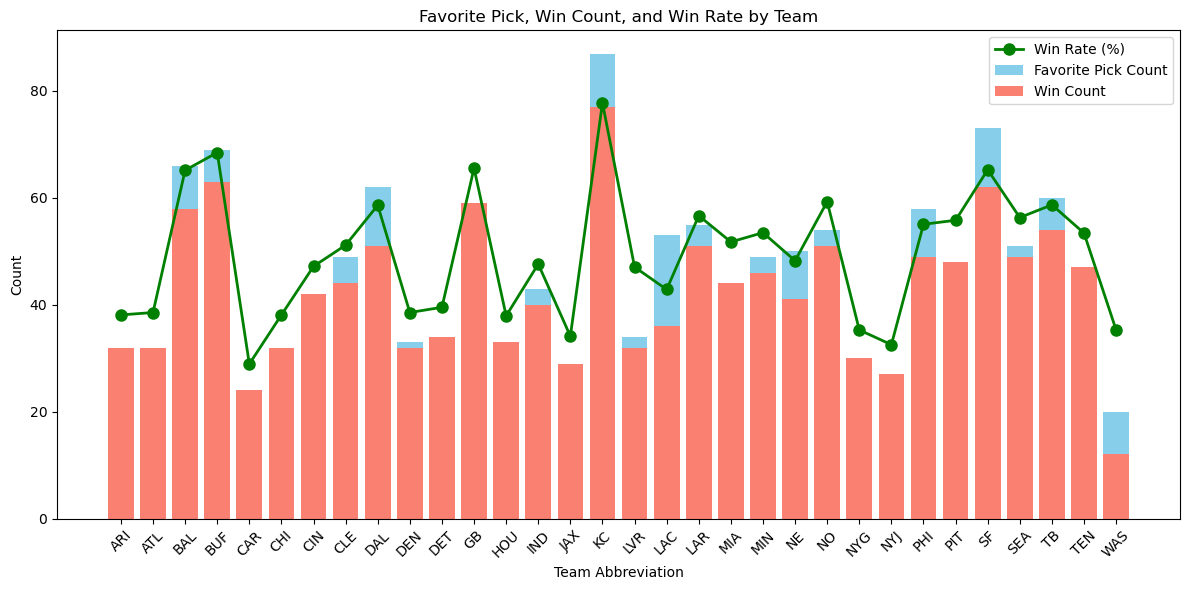

In [18]:
# Graph preparation
plt.figure(figsize=(12, 6))

# Assign data to x and y axes
x = merged_Data['Abbreviation']
y1 = merged_Data['Favorite Pick Count']
y2 = merged_Data['Win Count']
y3 = merged_Data['Win Rate']

# Draw bar plot
plt.bar(x, y1, color='skyblue', label='Favorite Pick Count')
plt.bar(x, y2, color='salmon', label='Win Count')
plt.plot(x, y3, color='green', marker='o', linestyle='-', linewidth=2, markersize=8, label='Win Rate (%)')

# Add title and axis labels
plt.title('Favorite Pick, Win Count, and Win Rate by Team')
plt.xlabel('Team Abbreviation')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'bar_plot_team_stats.png'))
plt.show()


# 4. Calculation for Questions

In [21]:
# Calculate Moneyline
def calculate_moneyline(clear_merge):
    return 100 / clear_merge
Moneyline_df = clear_merge
# Add Moneyline to Dataframe
Moneyline_df['Moneyline'] = Moneyline_df['Win Rate'].apply(calculate_moneyline)

# Result
Moneyline_df

,ID,Name,Abbreviation,Total played Game,Win Count,Favorite Pick Count,Win Rate,Moneyline
0,1,Arizona Cardinals,ARI,84,32,26,38.10,2.624672
1,2,Atlanta Falcons,ATL,83,32,31,38.55,2.594034
2,3,Baltimore Ravens,BAL,89,58,66,65.17,1.534448
3,4,Buffalo Bills,BUF,92,63,69,68.48,1.460280
4,5,Carolina Panthers,CAR,83,24,21,28.92,3.457815
5,6,Chicago Bears,CHI,84,32,24,38.10,2.624672
6,7,Cincinnati Bengals,CIN,89,42,40,47.19,2.119093
7,8,Cleveland Browns,CLE,86,44,49,51.16,1.954652
8,9,Dallas Cowboys,DAL,87,51,62,58.62,1.705902
9,10,Denver Broncos,DEN,83,32,33,38.55,2.594034


In [22]:
# CSV 파일 경로 설정
csv_file_path = "../CSV_Files/Moneyline_df.csv"

# DataFrame을 CSV 파일로 저장
Moneyline_df.to_csv(csv_file_path, index=False)

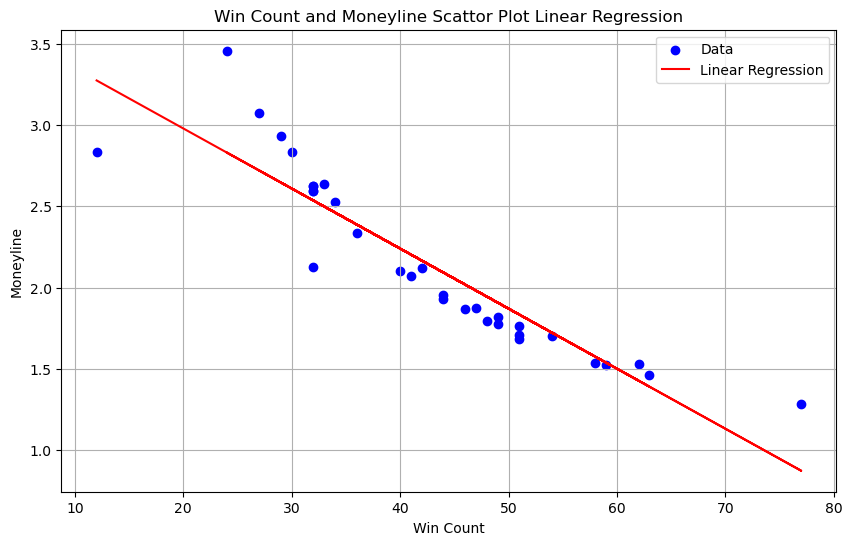

Win Count and Moneyline Correlation: -0.91665315831753


In [23]:
# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(Moneyline_df['Win Count'], Moneyline_df['Moneyline'])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Moneyline_df['Win Count'], Moneyline_df['Moneyline'], color='blue', label='Data')

# Plot linear regression line
plt.plot(Moneyline_df['Win Count'], intercept + slope * Moneyline_df['Win Count'], color='red', label='Linear Regression')

# Labeling the plot
plt.xlabel('Win Count')
plt.ylabel('Moneyline')
plt.title('Win Count and Moneyline Scattor Plot Linear Regression')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# correlation between Moneyline and Win Count
correlation = Moneyline_df['Win Count'].corr(Moneyline_df['Moneyline'])
print("Win Count and Moneyline Correlation:", correlation)


- Negative correlation between Win Count and Moneyline with a correlation coefficient of '-0.91665315831753' on Win Count and Moneyline Scattor Plot Linear Regression.

In [24]:
# Scatter plot with linear regression for Win Count and Moneyline
plt.figure(figsize=(10, 6))
plt.scatter(Moneyline_df['Win Count'], Moneyline_df['Moneyline'], color='green', label='Data')
plt.plot(Moneyline_df['Win Count'], intercept + slope * Moneyline_df['Win Count'], color='red', label='Linear Regression')
plt.xlabel('Win Count')
plt.ylabel('Moneyline')
plt.title('Scatter Plot with Linear Regression (Win Count vs Moneyline)')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, 'scatter_plot_win_count_vs_moneyline.png'))
plt.close()

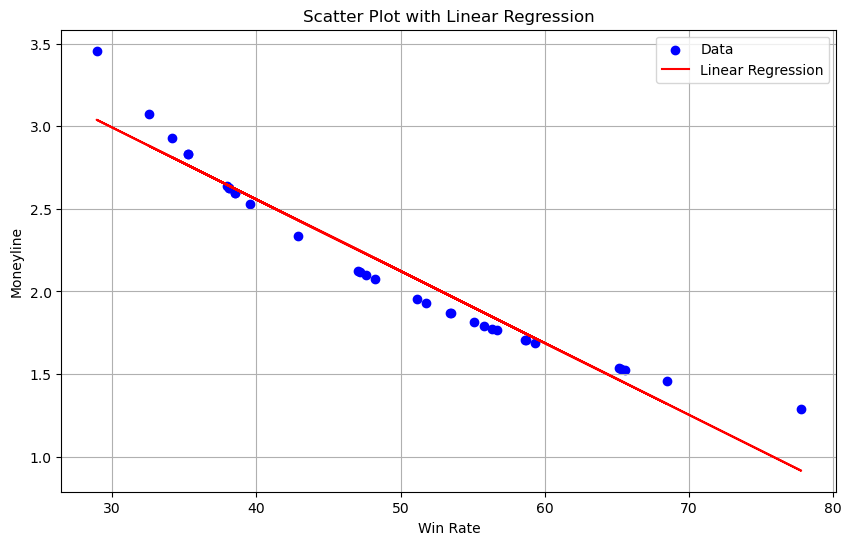

Correlation between Win Rate and Moneyline: -0.9686600108909719


In [25]:
# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(Moneyline_df['Win Rate'], Moneyline_df['Moneyline'])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Moneyline_df['Win Rate'], Moneyline_df['Moneyline'], color='blue', label='Data')

# Plot linear regression line
plt.plot(Moneyline_df['Win Rate'], intercept + slope * Moneyline_df['Win Rate'], color='red', label='Linear Regression')

# Labeling the plot
plt.xlabel('Win Rate')
plt.ylabel('Moneyline')
plt.title('Scatter Plot with Linear Regression')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
# Save Image
save_dir = "../Images"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
plt.savefig(os.path.join(save_dir, 'scatter_plot_with_linear_regression.png'))
plt.close()


# Calculate correlation
correlation = Moneyline_df['Win Rate'].corr(Moneyline_df['Moneyline'])
print("Correlation between Win Rate and Moneyline:", correlation)



 - Negative correlation between Win Rate and Moneyline with a correlation coefficient of '-0.9686600108909719' on Win Rate and Moneyline Scattor Plot Linear Regression.

In [26]:
# Scatter plot with linear regression
plt.figure(figsize=(10, 6))
plt.scatter(Moneyline_df['Win Rate'], Moneyline_df['Moneyline'], color='blue', label='Data')
plt.plot(Moneyline_df['Win Rate'], intercept + slope * Moneyline_df['Win Rate'], color='red', label='Linear Regression')
plt.xlabel('Win Rate')
plt.ylabel('Moneyline')
plt.title('Scatter Plot with Linear Regression')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, 'scatter_plot_with_linear_regression.png'))
plt.close()

In [27]:
# Calculate win count for each team
win_count_home = clean_df[clean_df['score_home'] > clean_df['score_away']]['team_home'].value_counts().reset_index()
win_count_home.columns = ['Team', 'Win at Home']
win_count_away = clean_df[clean_df['score_away'] > clean_df['score_home']]['team_away'].value_counts().reset_index()
win_count_away.columns = ['Team', 'Win at Away']
win_count = pd.concat([win_count_home, win_count_away]).groupby('Team').sum().reset_index()

# Merge win counts for home and away games for each team
win_total = win_count_home.merge(win_count_away, on='Team', how='outer').fillna(0)
win_total['Win Total'] = win_total['Win at Home'] + win_total['Win at Away']

# Calculate losses at home for each team
losses_at_home = clean_df[clean_df['score_home'] < clean_df['score_away']]['team_home'].value_counts().reset_index()
losses_at_home.columns = ['Team', 'Losses at Home']

# Calculate losses away for each team
losses_away = clean_df[clean_df['score_away'] < clean_df['score_home']]['team_away'].value_counts().reset_index()
losses_away.columns = ['Team', 'Losses away']

# Combine losses at home and away for each team
losses_total = losses_at_home.merge(losses_away, on='Team', how='outer').fillna(0)
losses_total['Total Losses'] = losses_total['Losses at Home'] + losses_total['Losses away']


In [28]:
# Calculate total games played for each team
total_games_home = clean_df['team_home'].value_counts().reset_index()
total_games_home.columns = ['Team', 'Total Games']
total_games_away = clean_df['team_away'].value_counts().reset_index()
total_games_away.columns = ['Team', 'Total Games']
total_games = pd.concat([total_games_home, total_games_away]).groupby('Team').sum().reset_index()

# Calculate draw (tie) for each team
draw_home = clean_df[clean_df['score_home'] == clean_df['score_away']]['team_home'].value_counts().reset_index()
draw_home.columns = ['Team', 'Draw(Tie)']
draw_away = clean_df[clean_df['score_away'] == clean_df['score_home']]['team_away'].value_counts().reset_index()
draw_away.columns = ['Team', 'Draw(Tie)']
draw_total = pd.concat([draw_home, draw_away]).groupby('Team').sum().reset_index()

# Merge total games and draw counts
draw_ratio = pd.merge(total_games, draw_total, on='Team', how='left').fillna(0)

# Calculate draw ratio
draw_ratio['Draw Ratio'] = draw_ratio['Draw(Tie)'] / draw_ratio['Total Games']

# Find team with most draws
most_draws = draw_ratio[draw_ratio['Draw Ratio'] == draw_ratio['Draw Ratio'].max()]

In [29]:
# Merge win count, losses total, draw total, and total games dataframes
team_stats = pd.merge(win_total, losses_total, on='Team', how='outer')
team_stats = pd.merge(team_stats, draw_total, on='Team', how='outer')
team_stats = pd.merge(team_stats, total_games, on='Team', how='outer')

team_stats


,Team,Win at Home,Win at Away,Win Total,Losses at Home,Losses away,Total Losses,Draw(Tie),Total Games
0,Kansas City Chiefs,41,36,77,13,9,22,NaN,99
1,Buffalo Bills,36,27,63,13,16,29,NaN,92
2,Green Bay Packers,34,25,59,11,20,31,NaN,90
3,San Francisco 49ers,30,32,62,17,16,33,NaN,95
4,Dallas Cowboys,30,21,51,13,23,36,NaN,87
5,Baltimore Ravens,29,29,58,16,15,31,NaN,89
6,Cleveland Browns,28,16,44,14,28,42,NaN,86
7,Miami Dolphins,27,17,44,15,26,41,NaN,85
8,Pittsburgh Steelers,27,21,48,15,22,37,1.0,86
9,Los Angeles Rams,27,24,51,16,23,39,NaN,90


In [ ]:
# Save as CSV file to located Direction
csv_file_path = "../CSV_Files/team_stats.csv"
team_stats.to_csv(csv_file_path, index=False)

### Answer For the Questions

-   Answer for the Q1, Q2

In [33]:
# Favorite Team Picked and game information
F_Team_rate = Moneyline_df.loc[Moneyline_df['Favorite Pick Count'].idxmax()]
print('---------------------------------------------------')
print(F_Team_rate)
print('---------------------------------------------------')

---------------------------------------------------
ID                                     16
Name                   Kansas City Chiefs
Abbreviation                           KC
Total played Game                      99
Win Count                              77
Favorite Pick Count                    87
Win Rate                            77.78
Moneyline                        1.285678
Name: 15, dtype: object
---------------------------------------------------


In [34]:
# Find team with most total win and losses
most_wins_total = win_total.loc[win_total['Win Total'].idxmax()]
most_losses_total = losses_total.loc[losses_total['Total Losses'].idxmax()]
print('---------------------------------------------------')
print("Team with most total wins:")
print(most_wins_total)
print('---------------------------------------------------')
print("Team with most total losses:")
print(most_losses_total)
print('---------------------------------------------------')

---------------------------------------------------
Team with most total wins:
Team           Kansas City Chiefs
Win at Home                    41
Win at Away                    36
Win Total                      77
Name: 0, dtype: object
---------------------------------------------------
Team with most total losses:
Team              Carolina Panthers
Losses at Home                   28
Losses away                      31
Total Losses                     59
Name: 0, dtype: object
---------------------------------------------------
